<a href="https://colab.research.google.com/github/matsunagalab/lecture_OR/blob/main/solver02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ソルバ2: PuLPで応用問題を解く

前回と同じように左上の「ファイル」メニューから「ドライブにコピーを保存」して始めてください。

今回は、応用問題である生産計画問題と輸送問題をPuLPで解きます。応用問題は条件が複雑になることが多いので、整理して扱えるように途中でPythonの文法を追加解説します。

## PuLPのインストール

前回同様、まずPuLPをインストールします。

In [1]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 30.9 MB/s eta 0:00:00


インストールが成功したか確認するために、pythonでPuLPパッケージをimportしてみます。なにも出力されなければ成功です。

In [2]:
# PuLPをロードする
from pulp import *

## 前回の復習: 練習問題3 (第4回小レポート課題より)

以下の標準形をPuLPで解いてみましょう

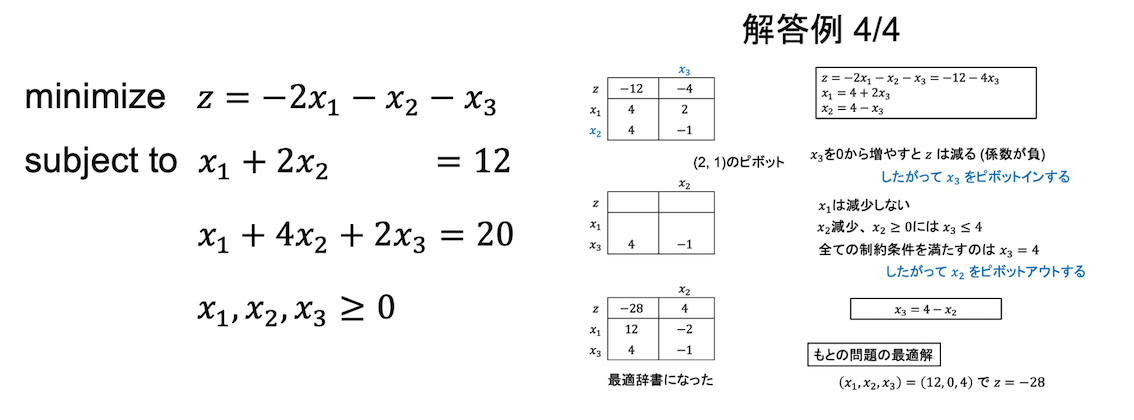

In [ ]:
problem = LpProblem('Problem_Name', LpMinimize)

x1 = LpVariable('x1', 0, None, LpContinuous)
x2 = LpVariable('x2', 0, None, LpContinuous)
x3 = LpVariable('x3', 0, None, LpContinuous)

problem += - 2 * x1 - x2 - x3
problem += x1 + 2*x2 == 12.0
problem += x1 + 4*x2 + 2*x3 == 20.0

print()
print("-" * 10)
print(problem)

problem.solve()

print()
print("-" * 10)
print('Status:', LpStatus[problem.status])

for v in problem.variables():
    print(v.name, '=', v.varValue)

print('The optimum value is ', value(problem.objective))

## 練習問題1: 生産計画問題

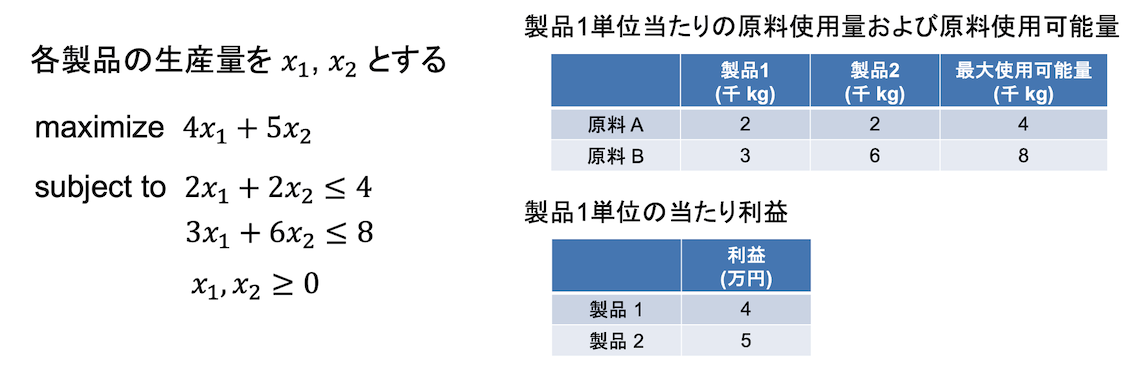

In [ ]:
# ここにコードを書いて実行

## Python文法の追加解説

輸送問題ではもう少し扱うパラメータが多くなるので、それを表現するための文法を追加で学びます。扱うパラメータが多くなってくると、それらをまとまりにして処理できるようになると便利です。そのためのデータ構造を実現するものとして前回「リスト」を学びました。まずリストを復習します。

リストは \[\] の中で、カンマで区切って表現します。例えば、

In [ ]:
A = [1, 2, 3]

数字以外の様々な型を要素に持つことができます。

In [ ]:
B = ["a", 1, "b"]

リストの要素を取り出すには、\[\] の中で０からはじまるインデックスを指定します

In [ ]:
B[0]

'a'

forループを使うとリストの要素に順番にアクセスすることができます

In [ ]:
for a in B:
    print(a) #要素ごとに処理したい命令

a
1
b


range型を用いてループ回すこともできます

In [ ]:
range(3)

range(0, 3)

In [ ]:
list(range(3))

[0, 1, 2]

In [ ]:
for i in range(3):
    print(B[i])

a
1
b


二重のリストを作ることもできます

In [ ]:
C = [[1, 2, 3], ["a", "b", "c"]]

二重のリストの要素へは以下のようにアクセスします

In [ ]:
C[0][2]

3

また、forループで要素にアクセスすることができます

In [ ]:
for i in range(2):
    for j in range(3):
        print(C[i][j])

1
2
3
a
b
c


リストに要素を追加するにはappendを使います

In [ ]:
A = [1, 2, 3]
A.append(100)
A

[1, 2, 3, 100]

ループでリストを作るには以下の「リスト内包表記」が便利です

In [ ]:
A = [i**3 for i in range(4)]
A

[0, 1, 8, 27]

In [ ]:
B = [i+j for i in range(2) for j in range(3)]
B

[0, 1, 2, 1, 2, 3]

Pythonは文字列も扱えます

In [ ]:
'x1'

'x1'

文字列は + 演算子で結合できます

In [ ]:
'x' + '1'

'x1'

数値はstr()関数で文字列へ変換できます

In [ ]:
str(1)

'1'

これまでのことを組み合わせると数値から `x1` という文字列を作れます

In [ ]:
i = 1
'x' + str(i)

'x1'

## 輸送問題を解く

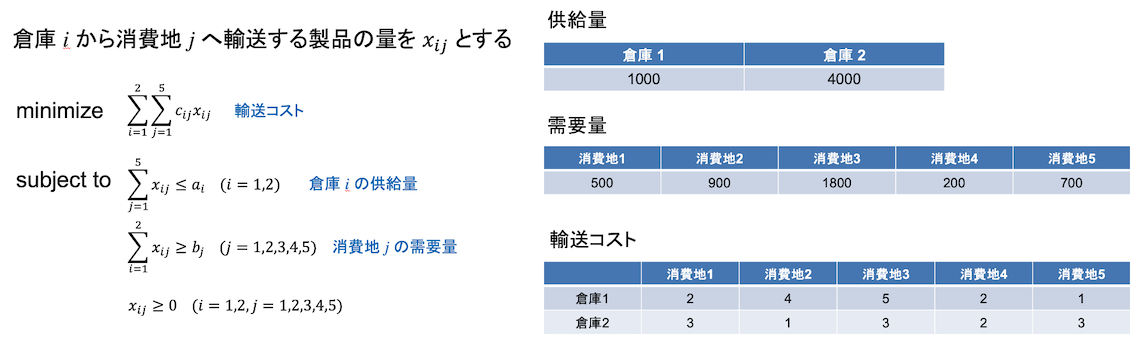

In [ ]:
supply = [1000, 4000]
demand = [500, 900, 1800, 200, 700]

costs = [#cities
         #j=0  1  2  3  4
           [2, 4, 5, 2, 1],#i=0   warehouses
           [3, 1, 3, 2, 3] #i=1
         ]

problem = LpProblem("輸送問題", LpMinimize)

vars = []
for i in range(2):
  v = []
  for j in range(5):
    v.append(LpVariable("x_"+str(i)+"_"+str(j), 0, None, LpContinuous))
  vars.append(v)

problem += lpSum([vars[i][j]*costs[i][j] for i in range(2) for j in range(5)])

for i in range(2):
    problem += lpSum([vars[i][j] for j in range(5)]) <= supply[i]

for j in range(5):
    problem += lpSum([vars[i][j] for i in range(2)]) >= demand[j]

print()
print("-" * 10)
print(problem)

problem.solve()

print()
print("-" * 10)
print('Status:', LpStatus[problem.status])
for v in problem.variables():
    print(v.name, '=', v.varValue)
print('The optimum value is ', value(problem.objective))


## 小レポート課題: 輸送問題

以下の輸送問題の最適解と最適値を求めなさい。WebClassへコードと出力(最適解と最適値を含む)をそれぞれ貼り付けて提出してください。

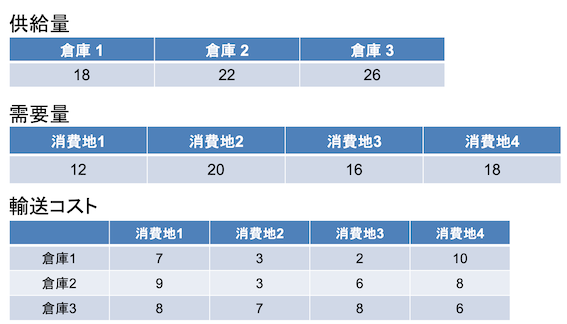

In [3]:
# ここにコードを書いて実行
supply = [18, 22, 26]
demand = [12, 20, 16, 18]

costs = [#cities
         #j=1  2  3  4
           [7, 3, 2, 10],#i=1   warehouses
           [9, 3, 6, 8], #i=2
           [8, 7, 8, 6]  #i=3
         ]

problem = LpProblem("輸送問題", LpMinimize)

vars = []
for i in range(3):
  v = []
  for j in range(4):
    v.append(LpVariable("x_"+str(i)+"_"+str(j), 0, None, LpContinuous))
  vars.append(v)

problem += lpSum([vars[i][j]*costs[i][j] for i in range(3) for j in range(4)])

for i in range(3):
    problem += lpSum([vars[i][j] for j in range(4)]) <= supply[i]

for j in range(4):
    problem += lpSum([vars[i][j] for i in range(3)]) >= demand[j]

print()
print("-" * 10)
print(problem)

problem.solve()

print()
print("-" * 10)
print('Status:', LpStatus[problem.status])
for v in problem.variables():
    print(v.name, '=', v.varValue)
print('The optimum value is ', value(problem.objective))


----------
輸送問題:
MINIMIZE
7*x_0_0 + 3*x_0_1 + 2*x_0_2 + 10*x_0_3 + 9*x_1_0 + 3*x_1_1 + 6*x_1_2 + 8*x_1_3 + 8*x_2_0 + 7*x_2_1 + 8*x_2_2 + 6*x_2_3 + 0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 <= 18

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 <= 22

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 <= 26

_C4: x_0_0 + x_1_0 + x_2_0 >= 12

_C5: x_0_1 + x_1_1 + x_2_1 >= 20

_C6: x_0_2 + x_1_2 + x_2_2 >= 16

_C7: x_0_3 + x_1_3 + x_2_3 >= 18

VARIABLES
x_0_0 Continuous
x_0_1 Continuous
x_0_2 Continuous
x_0_3 Continuous
x_1_0 Continuous
x_1_1 Continuous
x_1_2 Continuous
x_1_3 Continuous
x_2_0 Continuous
x_2_1 Continuous
x_2_2 Continuous
x_2_3 Continuous


----------
Status: Optimal
x_0_0 = 2.0
x_0_1 = 0.0
x_0_2 = 16.0
x_0_3 = 0.0
x_1_0 = 2.0
x_1_1 = 20.0
x_1_2 = 0.0
x_1_3 = 0.0
x_2_0 = 8.0
x_2_1 = 0.0
x_2_2 = 0.0
x_2_3 = 18.0
The optimum value is  296.0
